# K-nearest Neighbors

The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning algorithm. Building the model only consits of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, its "nearest neighbors".  

## K- Neighbors Classification 
When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances.  

### What does it mean "nearest"? 
The similarity measure is dependent on the type of data.   
For real-valued data, the **Euclidean distance** can be used.    
Other other types of data such as categorical or binary data, **Hamming distance** can be used.

### 1-neighbor Classification 
The algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is the simply the known output for this training point.  

### k-neighbor Classification 
we can consider an arbitrary number k of neighbors. We use voting to assign a label. This means, for each test point, we assign the class who has the majority vote among the k-neighbors   
    
## Examples of Classfication 
### 1. Dataset Forge

X.shape: (26, 2)


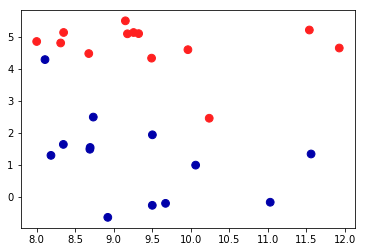

In [21]:
import mglearn
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))


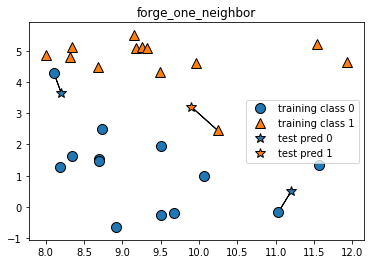

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor")

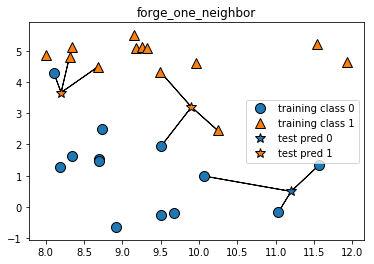

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title("forge_one_neighbor")

We split our data into a training and a test set, so we can evaluate generalization performance

In [24]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=3, p=2,
weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
clf.predict(X_test)


array([1, 0, 1, 0, 1, 0, 0])

In [28]:
clf.score(X_test, y_test)

0.8571428571428571

We see that our model is about 86% accurate, meaning the model predicted the class correctly for 85% of the samples in the test dataset.

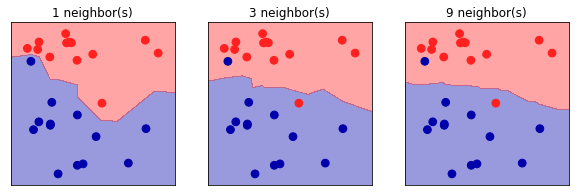

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)

Considering more and more neighbors leads to a smoother decision boundary.   
So, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity. 


### Breast cancer dataset 
A dataset which consists of 569 data points with 30 features detecting the patient having cancer or not.

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

print (cancer.data.shape)
print ("-"*40)
print (cancer.feature_names)
print ("-"*40)
print (X_train[0], y_train[0])
print ("-"*40)
print (X_train.shape)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

(569, 30)
----------------------------------------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
----------------------------------------
[  1.38700000e+01   2.07000000e+01   8.97700000e+01   5.84800000e+02
   9.57800000e-02   1.01800000e-01   3.68800000e-02   2.36900000e-02
   1.62000000e-01   6.68800000e-02   2.72000000e-01   1.04700000e+00
   2.07600000e+00   2.31200000e+01   6.29800000e-03   2.17200000e-02
   2.61500000e-02   9.06100000e-03   1.49000000e-02   3.59900000e-03
   1.505

In [43]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [44]:
print (y_test)

[1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [45]:
clf.score(X_test, y_test)

0.91608391608391604

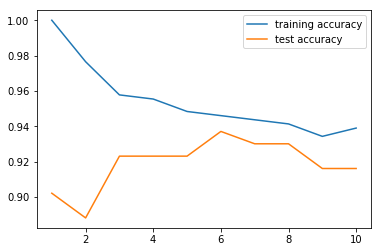

In [46]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

Considering a *single nearest neighbor*, the prediction on the training set is perfect.   
Considering *more neighbors*, the model becomes more simple, and the training accuracy drops.   
The test set accuracy for using a single neighbor is lower then when using more neighbors, indicating that using a single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple, and performance is even worse. The best performance is somewhere in the middle, around using six neighbors.

## k-Neighbors Regression  
    
### 1-Neighbor Regression 
The prediction is the simply the known output for thetraining point which is the closest to the unseen data.  
### k-neighbor Regression 
The prediction may be the average of output of k nearest neighbors. The weights may depend on the distance from the unseen data to its neighbors 

## Examples 
### 1. Wave dataset 
Wave dataset only has a signle input feature and a continuous target variable that we want to model.

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
--------------------------------------------------
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655

(-3.1, 3.1)

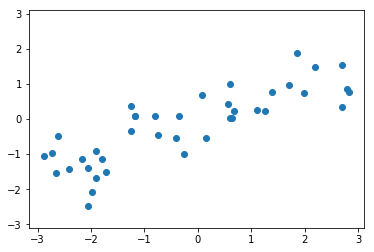

In [56]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print (X)
print("-"*50)
print(y)
plt.plot(X, y, 'o')
#plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3.1, 3.1)

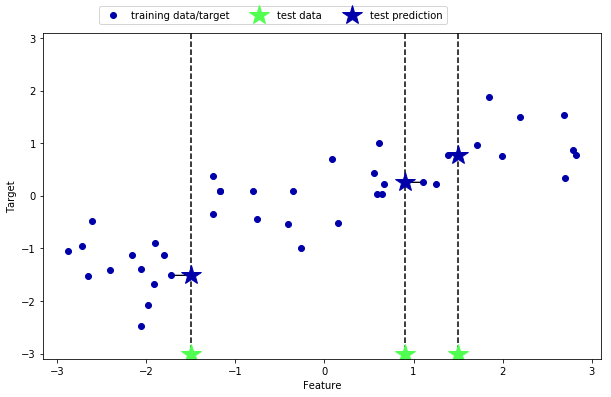

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

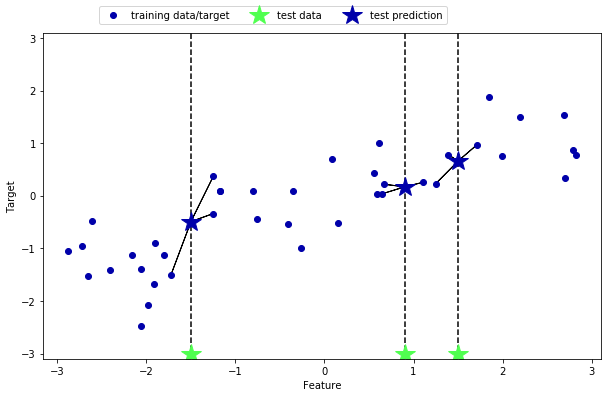

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [59]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2,weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

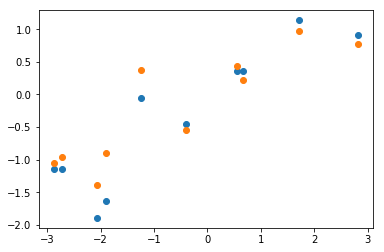

In [65]:


plt.plot(X_test, reg.predict(X_test), 'o')
plt.plot(X_test, y_test ,'o')

In [67]:
print (reg.predict(X_test))
print (y_test)

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


In [61]:
reg.score(X_test, y_test)

0.83441724462496036

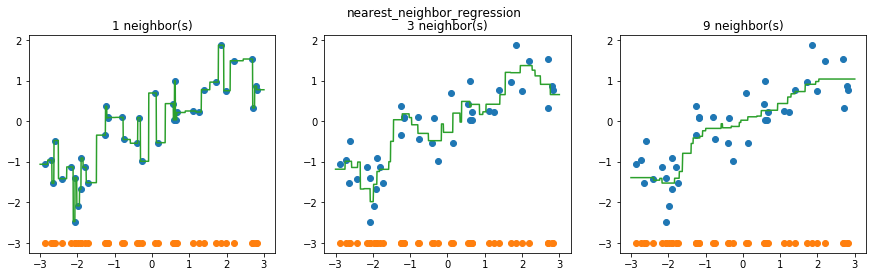

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("nearest_neighbor_regression")

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, 'o')
    ax.plot(X, -3 * np.ones(len(X)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)

## Conclusion 
In principal, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like 3 or 5 often works well, but you should certainly adjust this parameter.   
     
One of the strengths of nearest neighbors is that the model is very easy to understand,and often gives reasonable performance without a lot of adjustments. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow    
    
So while the nearest neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow, and its inability to handle many features. The method we discuss next has neither of these drawbacks